In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import datetime
import sklearn
import matplotlib.pyplot as plt
import math
from google.colab import drive

In [19]:
drive.mount('/content/drive')
train_data = np.load('/content/drive/MyDrive/Colab Notebooks/Data/train.npz')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# separate bands and labels:
bands = train_data['bands']
labels = train_data['lulc']

 Data visualization


In [21]:
# add class labels manually
classes = np.array(['No Data', 'Cultivated Land', 'Forest', 'Grassland', 'Shrubland', 'Water', 'Wetlands', 'Tundra', 'Artificial Surface', 'Bareland', 'Snow and Ice'])

In [22]:
# plot histogram:
np.histogram(labels, bins=list(range(len(classes))))

(array([1308,  238, 5796, 1125,  770,   58,    0,    0,  217,  488]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

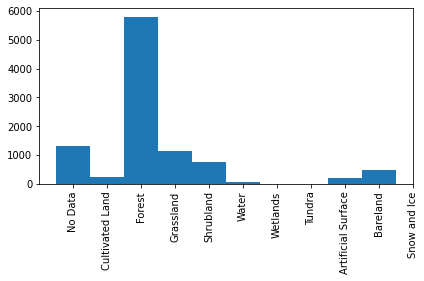

In [23]:
plt.hist(labels, bins=list(range(len(classes))))
plt.xticks(ticks=list(map(lambda x: x+0.5, list(range(len(classes))))), labels=classes, rotation=90)
plt.tight_layout()
plt.show()

## First experiment

In [26]:
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPool2D, ReLU, BatchNormalization, GlobalAveragePooling2D, Dropout

model = keras.Sequential()

model.add(keras.layers.Conv2D(10, 3, strides=1, input_shape=(None, None, 6)))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(20, 5))
model.add(keras.layers.Activation("relu"))
#model.add(keras.layers.MaxPooling2D(pool_size=3))
model.add(keras.layers.Conv2D(40, 7))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(40, 13))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(400, 9))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(400, 1))
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Conv2D(11, 1))
model.add(keras.layers.Activation("softmax"))

model.compile(
  'Adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, None, None, 10)    550       
_________________________________________________________________
activation (Activation)      (None, None, None, 10)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 20)    5020      
_________________________________________________________________
activation_1 (Activation)    (None, None, None, 20)    0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 40)    39240     
_________________________________________________________________
activation_2 (Activation)    (None, None, None, 40)    0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 40)   

In [27]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = model.fit(train_data, 
                    labels, 
                    epochs=15,
                    batch_size=64,
                    validation_split=0.1,
                   )